## simple auto-complete engine

Auto-completion functionalities are now ubiquitous in search engines, document editors, and messaging apps. 

A [trie tree](https://en.wikipedia.org/wiki/Trie), or a prefix tree, data structure stores a set of strings in a collection of nodes so that all strings with a common prefix are found in the same branch of the tree. Each node is associated with a letter, and as you traverse down the tree, you pick up more letters, eventually forming a word. Complete words are commonly found on the leaf nodes. However, some inner nodes can also mark full words.


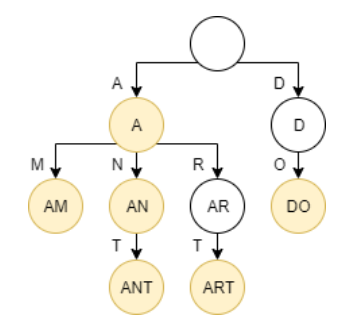

In [19]:
from IPython.display import Image
Image(filename='Trie.png')

- Nodes that mark valid words are marked in yellow. Notice that while all leaves are considered valid words, only some inner nodes contain valid words, while some remain only prefixes to valid words appearing down the branch.

- The tree does not have to be balanced, and the height of different branches depends on its contents.

- In our implementation, branches never merge to show common suffixes (for example, both ANT and ART end in T, but these nodes are kept separate in their respective branches). However, this is a common first line of memory optimization for tries.

- The first node contains an empty string; it “holds the tree together.”

Task is: To insert words into a dictionary, lookup valid and invalid words, print your dictionary in alphabetical order, and suggest appropriate suffixes like an auto-complete bot.

**Two main approaches to building trees, are making separate Tree and Node classes, or only making a Node class.**

While both techniques seem plausible, I believe separating the node class from the tree class, as opposed to having a single node class is a more optimal approach because it allows for easier and more flexible encapsulation and inheritance. Encapsulation in this case, is when we group related variables and functions together. For example, the node class instantiating characters that form words, while the tree class groups methods that make use of the node class, to build word trees, modify and traverse through them for example. This functionality would otherwise be limited with a single class, since it would be difficult to build new word trees as we would need to change many lines of code, but in a two-class case, we might only need to alter the node class. Methods for try trees also mostly only apply to trees like 'look up', 'insert', delete and so on, and since the nodes lack such methods, it would make sense to separate the two classes. 

In [2]:
# VERSION 1 - Node + Trie classes
#node class
class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):        
        #initialize character in specific nodes
        self.char = char 
        self.children = {} #empty dictionary of child nodes
        self.terminating = False #asserts if we've reached the end of a word, as we traverse down a tree
        
#Tree class         
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        
        self.root = Node('')
        self.word_list = word_list
        #if non-empty list:
        if self.word_list != None:
            for new_word in self.word_list:
                #make calls to insert method
                self.insert(new_word)
                    
    
    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        #to avoid unnecessary assertion errors, evaluate words in lower case
        word = str(word)
        word = word.lower()
        
        #initialize root
        current = self.root
        for char in word: 
            if char not in current.children:
                #assign the character to a node
                current.children[char] = Node(char)
            current = current.children[char]
            
        # indicate end of the word --> after iterating through and inserting all characters  
        current.terminating = True
    
        
    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        #initialize root
        current = self.root
        
        #to avoid unnecessary assertion errors, evaluate words in lower case
        word = str(word)
        word = word.lower()
        
        #traverse a root and its children
        for char in word:
            if char not in current.children:
                return False
            else:
                current = current.children[char]
                
        return current.terminating
        
      #to check prefixes --> N/A here
#     def word_prefix(self,prefix):
#         current = self.root
#         for char in prefix:
#             if char not in current.children:
#                 return False
#             else:
#                 current = current.children[char]
#         return True

In [3]:
# tests
# This is Namárië, JRRT's elvish poem written in Quenya
wordbank = "Ai! laurië lantar lassi súrinen, yéni unótimë ve rámar aldaron! Yéni ve lintë yuldar avánier mi oromardi lisse-miruvóreva Andúnë pella, Vardo tellumar nu luini yassen tintilar i eleni ómaryo airetári-lírinen. Sí man i yulma nin enquantuva? An sí Tintallë Varda Oiolossëo ve fanyar máryat Elentári ortanë, ar ilyë tier undulávë lumbulë; ar sindanóriello caita mornië i falmalinnar imbë met, ar hísië untúpa Calaciryo míri oialë. Sí vanwa ná, Rómello vanwa, Valimar! Namárië! Nai hiruvalyë Valimar. Nai elyë hiruva. Namárië!".replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()

trie = Trie(wordbank)
# be careful about capital letters!
assert trie.lookup('oiolossëo') == True
# this is a prefix, but also a word in itself
assert trie.lookup('an') == True
# this is a prefix, but NOT a word
assert trie.lookup('ele') == False
# not in the wordbank


In [4]:
#Additional test cases
new_string = "Cher correcteur de mon devoir, Merci d'avoir pris le temps de revoir mon article. Je sais que vous ne me donnerez que des 4 et 5 parce que vous êtes le plus gentil et le meilleur humain que je connaisse jusqu'à présent!".replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()

trie = Trie(new_string)

assert trie.lookup('Noni') == False
#not in new string 
assert trie.lookup("d'avoir") == True
#the abbreviation is replaced by empty space and the word is valid and exists
assert trie.lookup('meilleur') == True
#word is in new string
assert trie.lookup('présent!') == False
#exclamation does not count as a character
assert trie.lookup('5') == True
#work for the number 5 as in this case it is a string not an integer

# Note: There are several ways in which we can condense the text cleaning syntax, 
# without repeating the method replace() multiple times, 
# but we are leaving it this way for clarity.

## The computational complexity of tries

Intuitively, the trie trees and binary search trees should not be compared in terms of functionality as any BST node can have at most two children while a trie tree node can have as many children as possible, in the case of letters, 26 potential children. BST property also has to be maintained at all times and therefore, it may be a bit complex to directly compare the two data structures.

However, again from intuition, if we take n to be the number of characters for a given word, both the insert() and lookup() methods of a trie tree should have a linear time complexity, as we have 1 for loop that iterates through each character for a given word. For both the trie tree and BST data structures, the runtime corresponds to the tree heights. A BST's complexity for insertion() takes Big O(log n), as we would need to make n/2 number of comparisons to find an index to insert a new node but this can go up to O(n) in a worst case scenario. In a trie tree, both insert and look up scale with the length of a word. For this reason, the BST in a non-specified context can be thought of as a better data structure.

We however, would still want to use trie trees for functions such as those we see in this assignment, finding the most common word, autocompletion for example, where if a string is not present in the tree, we give an output similar to the input or find the most common word to which it is a prefix, returning that word instead or itself. Such processes do not rely on maintenance of certain properties, and the flexibility of a node to have multiple children, makes it ideal for certain applications, less achievable by other data structures eg BSTs especially when we are dealing with strings.


## Using Pre-order traversal to print a dictionary in alphabetical order.

On the example trie given in the introduction, pre-order traversal would return ["A", "AM, "AN", "ANT", "AR, "ART, "D" and "DO"]. However, since we are only interested in the actual words, we would not include "D" and "AR" in our list. I'll need to include an attribute for each node, storing the information about whether its content is a word or not.



In [21]:
# add the method either to the Node or the Trie class.
#still using the two-classes technique

#node class
class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):        
        #initialize character in specific nodes
        self.char = char 
        self.children = {} #empty dictionary of child nodes
        self.terminating = False #asserts if we've reached the end of a word, as we traverse down a tree
        self.is_word = False
         
     #To allow printing    
    def __repr__(self):
        return f"char {self.char} child {self.children}  leaf {self.terminating} if a word {self.is_word}"
        
#Tree class         
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
                
        self.root = Node('')
        self.word_list = word_list
        #if non-empty list:
        if self.word_list != None:
            for new_word in self.word_list:
                #make calls to insert method
                self.insert(new_word)

    
    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """        
        #to avoid unnecessary assertion errors, evaluate words in lower case
        word = str(word)
        word = word.lower()
        
        #initialize root
        current = self.root
        for char in word: 
            if char not in current.children:
                #assign the character to a node
                current.children[char] = Node(char)
            current = current.children[char]
            
        # indicate end of the word --> after iterating through and inserting all characters  
        current.terminating = True
        current.is_word = True
    
    
    # method to return list of words in alpabetical order
    def alphabetical_list(self):
        """Delivers the content of the trie in alphabetical order.

        You can create other methods if it helps you,
        but the tests should use this one.
        
        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """        
        #preorder traversal seems optimal
        
        ordered = []
        
        current = self.root
        
        #use dictionaries' keys method
        pointer_s = list(current.children.keys())
        pointer_s.sort()
        
        if pointer_s == None:
            return ordered
        
        for pointer in pointer_s:
            #calls preorder function defined below
            ordered += self.preorder(pointer)
        return ordered
    
    def preorder(self, pointer):
        self.output = []
        current = self.root
        current = current.children[pointer]
        #call depth first search to be defined after
        self.DFS(current, "")
        
        return self.output
   
    #define a depth first search method  --> will use the current node current prefix to find a word down the tree
    def DFS(self,current, prefix):
        
        
        if current.terminating:
            self.output.append(prefix + current.char)
        #as before:    
        pointer_s = list(current.children.values())
        pointer_s = sorted(pointer_s, key = lambda pointer: pointer.char)
        
        for pointer in pointer_s:
            self.DFS(pointer, prefix + current.char)
            
# Alternatively code below works too --> uncomment to run
            
#     def alphabetical_list(self,current=None, ordered =None,word=""):
#         """Delivers the content of the trie in alphabetical order.

#         You can create other methods if it helps you,
#         but the tests should use this one.
        
#         Returns
#         ----------
#         list
#             List of strings, all words from the trie in alphabetical order.
#         """
#         if current == None:
#             current = self.root
        
        
#         if ordered == None:
#             ordered = []
        
#         word += current.char
        
       
#         if current.terminating == True and current.is_word == True:
#             ordered.append(word)
        

#         for i in sorted(current.children):
#             child=current.children[i]
#             ordered=self.alphabetical_list(child, ordered ,word)
#         return ordered
        

In [22]:
# intiate the test by uncommenting one of the lines below, depending on your approach

wordbank = "Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Duis pulvinar. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos hymenaeos. Nunc dapibus tortor vel mi dapibus sollicitudin. Etiam quis quam. Curabitur ligula sapien, pulvinar a vestibulum quis, facilisis vel sapien.".replace(",", "").replace(".", "").split()
#wordbank = "a an ant am art do".split()
trie = Trie(wordbank)
trie.root

#print(trie.alphabetical_list())

assert trie.alphabetical_list() == ['a','ad','adipiscing','amet','aptent',
                                    'class','consectetuer','conubia',
                                    'curabitur','dapibus','dolor','duis',
                                    'elit','etiam','facilisis','hymenaeos',
                                    'inceptos','ipsum','ligula','litora',
                                    'lorem','mi','nostra','nunc','per',
                                    'pulvinar','quam','quis','sapien',
                                    'sit','sociosqu','sollicitudin','taciti',
                                    'torquent','tortor','vel','vestibulum']

In [23]:
#debug ---> eliminate the (is_word == False) from the list

In [24]:
#test for mixed lower and upper cases
test1 = "eVRYDAY is a fashion show and the wOrld your runway".split()
trie1 = Trie(test1)

#test for edge case -- when input is None
test2 = ""
trie2 = Trie(test2)

#test for numericals as strings not integers
test3 = "5tars g0t tan91ed 1n h3r ha1R wh3n3V3R 5he p1ay3d 1n The sky <3 ".replace("<", "").split()
trie3 = Trie(test3)

#trie.root

print(trie1.alphabetical_list())
print(trie2.alphabetical_list())
print(trie3.alphabetical_list())

['a', 'and', 'evryday', 'fashion', 'is', 'runway', 'show', 'the', 'world', 'your']
[]
['1n', '3', '5he', '5tars', 'g0t', 'h3r', 'ha1r', 'p1ay3d', 'sky', 'tan91ed', 'the', 'wh3n3v3r']


## k most common words in a speech.

To mathematically determine the overall connotation of a speech, I will compute which words are most frequently used and then run a [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis).


In [25]:
#node class
class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):        
        #initialize character in specific nodes
        self.char = char # letter in the node
        self.children = {} #empty dictionary of child nodes
        self.terminating = False #asserts if we've reached the end of a word, as we traverse down a tree
        self.is_word = False
        self.word_count = 0 # initialize word frequency
         
     #To allow printing    
    def __repr__(self):
        return f"char {self.char} child {self.children}  leaf {self.terminating} if a word {self.is_word}"
        
        
#Tree class
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """        
        self.root = Node('')
        self.word_list = word_list
        #if non-empty list:
        if self.word_list != None:
            for new_word in self.word_list:
                #make calls to insert method
                self.insert(new_word)
                
    
    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """        
        #to avoid unnecessary assertion errors, evaluate words in lower case
        word = str(word)
        word = word.lower()
        
        #initialize root
        current = self.root
        for char in word: 
            if char not in current.children:
                #assign the character to a node
                current.children[char] = Node(char)
            current = current.children[char]
            
        # indicate end of the word --> after iterating through and inserting all characters  
        current.terminating = True
        current.is_word = True
        current.word_count += 1


    def alphabetical_list(self):
        """Delivers the content of the trie in alphabetical order.

        You can create other methods if it helps you,
        but the tests should use this one.
        
        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """        
        #preorder traversal seems optimal
        
        #create empty list to add sorted words
        ordered = []
        #initialize root
        current = self.root
        
        #use dictionaries' keys method to sort list
        pointer_s = list(current.children.keys())
        pointer_s.sort()
        
        if pointer_s == None:
            return ordered
        
        for pointer in pointer_s:
            #calls preorder function defined below
            ordered += self.preorder(pointer)
            
        ordered = sorted(ordered, key = lambda key: key[1], reverse = True)
        return ordered

    #as in question 3:
    def preorder(self, pointer):
        self.output = []
        current = self.root
        current = current.children[pointer]
        
        self.DFS(current, "")
        
        return self.output
    
    
    #define a depth first search method  --> will use the current node and current prefix to find a word down the tree, and keep count
    def DFS(self,current, prefix):
        #at the end of the current node append prefix + the current character and the word count -->as a tuple
        if current.terminating:
            self.output.append((prefix + current.char, current.word_count))
        #as before:    
        pointer_s = list(current.children.values())
        pointer_s = sorted(pointer_s, key = lambda pointer: pointer.char)
        
        for pointer in pointer_s:
            #recursively build the most common words
            self.DFS(pointer, prefix + current.char)
        
    
    def k_most_common(self, k):
        """Finds k words inserted into the trie most often.

        You will have to tweak some properties of your existing code,
        so that it captures information about repeated insertion.

        Parameters
        ----------
        k : int
            Number of most common words to be returned.

        Returns
        ----------
        list
            List of tuples.
            
            Each tuple entry consists of the word and its frequency.
            The entries are sorted by frequency.

        Example
        -------
        >>> print(trie.k_most_common(3))
        [(‘the’, 154), (‘a’, 122), (‘i’, 122)]
        
        I.e. the word ‘the’ has appeared 154 times in the inserted text.
        The second and third most common words both appeared 122 times.
        """
        if k == 0:
            return [] #returns an empty list for k == 0
        repeated_words = self.alphabetical_list()
        if repeated_words == []:
            return "Please insert a word"
        if k > len(repeated_words):
            return ""
        
        return repeated_words[:k]
            

In [26]:
#test print output
from requests import get
speakers = ['Faruqi', 'Kennedy', 'King', 'Thunberg', 'Havel']
bad_chars = [';', ',', '.', '?', '!', '_', 
             '[', ']', ':', '“', '”', '"', '–', '-']

for speaker in speakers:
    
    # download and clean up the speech from extra characters
    speech_full = get(f'https://bit.ly/CS110-{speaker}').text
    just_text = ''.join(c for c in speech_full if c not in bad_chars)
    without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in just_text)
    just_words = [word for word in without_newlines.split(" ") if word != ""]
    
    trie = Trie(just_words)
    #trie = Node(just_words)
    
    if speaker == 'Faruqi':
        Faruqi = [('the', 60), ('and', 45), ('to', 39), ('in', 37), 
                  ('of', 34), ('is', 25), ('that', 22), ('this', 21), 
                  ('a', 20), ('people', 20), ('has', 14), ('are', 13), 
                  ('for', 13), ('we', 13), ('have', 12), ('racism', 12), 
                  ('black', 11), ('justice', 9), ('lives', 9), ('police', 9)]
print(trie.k_most_common(20))

[('the', 34), ('of', 23), ('and', 20), ('to', 15), ('in', 13), ('a', 12), ('that', 12), ('are', 9), ('we', 9), ('have', 8), ('human', 8), ('is', 8), ('you', 8), ('as', 7), ('for', 7), ('has', 7), ('this', 7), ('be', 6), ('it', 6), ('my', 6)]


In [11]:
# Mehreen Faruqi - Black Lives Matter in Australia: https://bit.ly/CS110-Faruqi
# John F. Kennedy - The decision to go to the Moon: https://bit.ly/CS110-Kennedy
# Martin Luther King Jr. - I have a dream: https://bit.ly/CS110-King
# Greta Thunberg - UN Climate Summit message: https://bit.ly/CS110-Thunberg
# Vaclav Havel - Address to US Congress after the fall of Soviet Union: https://bit.ly/CS110-Havel

from requests import get
speakers = ['Faruqi', 'Kennedy', 'King', 'Thunberg', 'Havel']
bad_chars = [';', ',', '.', '?', '!', '_', 
             '[', ']', ':', '“', '”', '"', '–', '-']

for speaker in speakers:
    
    # download and clean up the speech from extra characters
    speech_full = get(f'https://bit.ly/CS110-{speaker}').text
    just_text = ''.join(c for c in speech_full if c not in bad_chars)
    without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in just_text)
    just_words = [word for word in without_newlines.split(" ") if word != ""]
    
    #method is defined in tree class not node class so:
    trie = Trie(just_words)
    # trie = Node(just_words)
    
    if speaker == 'Faruqi':
        Faruqi = [('the', 60), ('and', 45), ('to', 39), ('in', 37), 
                  ('of', 34), ('is', 25), ('that', 22), ('this', 21), 
                  ('a', 20), ('people', 20), ('has', 14), ('are', 13), 
                  ('for', 13), ('we', 13), ('have', 12), ('racism', 12), 
                  ('black', 11), ('justice', 9), ('lives', 9), ('police', 9)]
        assert trie.k_most_common(20) == Faruqi
    
    elif speaker == 'Kennedy':
        Kennedy = [('the', 117), ('and', 109), ('of', 93), ('to', 63), 
                   ('this', 44), ('in', 43), ('we', 43), ('a', 39), 
                   ('be', 30), ('for', 27), ('that', 27), ('as', 26), 
                   ('it', 24), ('will', 24), ('new', 22), ('space', 22), 
                   ('is', 21), ('all', 15), ('are', 15), ('have', 15), ('our', 15)]
        assert trie.k_most_common(21) == Kennedy
    
    elif speaker == 'Havel':
        Havel = [('the', 34), ('of', 23), ('and', 20), ('to', 15), 
                 ('in', 13), ('a', 12), ('that', 12), ('are', 9), 
                 ('we', 9), ('have', 8), ('human', 8), ('is', 8), 
                 ('you', 8), ('as', 7), ('for', 7), ('has', 7), ('this', 7), 
                 ('be', 6), ('it', 6), ('my', 6), ('our', 6), ('world', 6)]
        assert trie.k_most_common(22) == Havel
    
    elif speaker == 'King':
        King = [('the', 103), ('of', 99), ('to', 59), ('and', 54), ('a', 37), 
                ('be', 33), ('we', 29), ('will', 27), ('that', 24), ('is', 23), 
                ('in', 22), ('as', 20), ('freedom', 20), ('this', 20), 
                ('from', 18), ('have', 17), ('our', 17), ('with', 16), 
                ('i', 15), ('let', 13), ('negro', 13), ('not', 13), ('one', 13)]
        assert trie.k_most_common(23) == King
    
    elif speaker == 'Thunberg':
        Thunberg = [('you', 22), ('the', 20), ('and', 16), ('of', 15), 
                    ('to', 14), ('are', 10), ('is', 9), ('that', 9), 
                    ('be', 8), ('not', 7), ('with', 7), ('i', 6), 
                    ('in', 6), ('us', 6), ('a', 5), ('how', 5), ('on', 5), 
                    ('we', 5), ('all', 4), ('dare', 4), ('here', 4), 
                    ('my', 4), ('people', 4), ('will', 4)]
        assert trie.k_most_common(24) == Thunberg
        
# Note: There are cleaner and more concise ways to write the code above, 
# but this way it should be easily understandable.

In [27]:
# #test for edge case -- when input is None
test1 = []
trie1 = Trie(test1)

test2 = ""
trie2 = Trie(test2)

# #test for numericals as strings not integers
test3 = "There are known Knowns: the things we know we know. There are known unknowns: things we know we don't know. There are also Unknown knowns: Things we know and chose not to know them or let other people know we know. And there are unknown Unknowns: Things we don't know we don't know. ".replace("<", "").replace(",", "").replace(".", "").split()
trie3 = Trie(test3)

#perform 2 test cases in test 4
#first, if k = 0 would output an empty list --> which it does
#second, if frequency of tuples are also taken ito account 
test4 = [('Mom', 'vacation'),('Dad', 'car'),('Mitchel', 'yes_day'),('Karen', 'gadgets'), ('Tobby', 'dog_spa_and_food'), ('Mom', 'vacation')]
trie4 = Trie(test4)

print(trie1.k_most_common(1))
print(trie2.k_most_common(2)) 
print(trie3.k_most_common(5))
print(trie4.k_most_common(0))
print(trie4.k_most_common(2))

Please insert a word
Please insert a word
[('know', 10), ('we', 8), ('are', 4), ('there', 4), ('things', 4)]
[]
[("('mom', 'vacation')", 2), ("('dad', 'car')", 1)]


## Autocomplete with a Shakespearean dictionary!

Frequentist approach. 

In [28]:
#node class
class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, char):
        # YOUR CODE HERE
        
        #initialize character in specific nodes
        self.char = char # letter in the node
        self.children = {} #empty dictionary of child nodes
        self.terminating = False #asserts if we've reached the end of a word, as we traverse down a tree
        self.is_word = False
        self.word_count = 0 # initialize word frequency
         
     #To allow printing    
    def __repr__(self):
        return f"char {self.char} child {self.children}  leaf {self.terminating} if a word {self.is_word}"
        
        
#Tree class
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        
        # YOUR CODE HEREs 
        
        self.root = Node('')
        self.word_list = word_list
        #if non-empty list:
        if self.word_list != None:
            for new_word in self.word_list:
                #make calls to insert method
                self.insert(new_word)


    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        # YOUR CODE HERE
        #to avoid unnecessary assertion errors, evaluate words in lower case
        word = str(word)
        word = word.lower()
        
        #initialize root
        current = self.root
        for char in word: 
            if char not in current.children:
                #assign the character to a node
                current.children[char] = Node(char)
            current = current.children[char]
            
        # indicate end of the word --> after iterating through and inserting all characters  
        current.terminating = True
        current.is_word = True
        current.word_count += 1

    #almost similar to the lookup() method, but instead of finding a word, we search for the prefix
    def autocomplete(self, prefix):
        """Finds the most common word with the given prefix.

        You might want to reuse some functionality or ideas from Q4.

        Parameters
        ----------
        prefix : str
            The word part to be “autocompleted”.

        Returns
        ----------
        str
            The complete, most common word with the given prefix.
            
        Notes
        ----------
        The return value is equal to prefix if there is no valid word in the trie.
        The return value is also equal to prefix if prefix is the most common word.
        """
        # YOUR CODE HERE
        #initialize root
        current = self.root
        
        #create empty list for most common word for a given prefix
        self.output = []
        
        # Check if the prefix exists in the tree
        for char in prefix:
            if char not in current.children:
                # return the input prefix if it is not present in trie tree
                return prefix
                
            else:
                current = current.children[char]
                
        #if the prefix is a complete word, return the full word
        if not current.children:
            return prefix
        
        
        # Use depth first search to search through the entire tree
        self.DFS(current, prefix[:-1])

        # sort output list in reverse order
        output = sorted(self.output, key=lambda x: x[1], reverse = True)
        
        return output[0][0]
        

    def DFS(self,current, prefix):
        """Depth-first traversal of the trie
        
        Args:
            - node: the node to start with
            - prefix: the current prefix, for tracing a
                word while traversing the trie
        """
        
        #At the end of a word, add it to our current list of outputs
        if current.terminating:
            self.output.append((prefix + current.char, current.word_count))
            
        completed = list(current.children.values())
        completed = sorted(completed, key = lambda pointer: pointer.char)
        
        #recursively build words with the prefix, as we traverse the tree
        for pointer in completed:
            #call DFS, passing the child node and prefix plus additional characters if any
            self.DFS(pointer, prefix + current.char)
        

In [29]:
# The Complete Works of William Shakespear
from requests import get
bad_chars = [';', ',', '.', '?', '!', '1', '2', '3', '4',
             '5', '6', '7', '8', '9', '0', '_', '[', ']']

SH_full = get('http://bit.ly/CS110-Shakespeare').text
SH_just_text = ''.join(c for c in SH_full if c not in bad_chars)
SH_without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in SH_just_text)
SH_just_words = [word for word in SH_without_newlines.split(" ") if word != ""]

SH_trie = Trie(SH_just_words)
# SH_trie = Node(SH_just_words)

print(SH_trie.autocomplete('hist'))
print(SH_trie.autocomplete('en'))
print(SH_trie.autocomplete('cae'))


assert SH_trie.autocomplete('hist') == 'history'
assert SH_trie.autocomplete('en') == 'enter'
assert SH_trie.autocomplete('cae') == 'caesar'
assert SH_trie.autocomplete('gen') == 'gentleman'
assert SH_trie.autocomplete('pen') == 'pen'
assert SH_trie.autocomplete('tho') == 'thou'
assert SH_trie.autocomplete('pent') == 'pentapolis'
assert SH_trie.autocomplete('petr') == 'petruchio'

history
enter
caesar


In [30]:
# test for edge case -- when input is None / when prefix does not exist --> outputs the prefix we input
test1 = []
trie1 = Trie(test1)

#test for numericals as strings not integers --> numerals in this case are not recognized as word prefixes
test2 = '0n the r0ads 0f failure 1t 1s not unc0mmon to see the tears of the talented: and 0n the land of success, t0 hear the victorious screams of the incompetent'
trie2 = Trie(test2)

#test for a general case
test3 = "There are known Knowns: the things we know we know. There are known unknowns: things we know we don't know. There are also Unknown knowns: Things we know and chose not to know them or let other people know we know. And there are unknown Unknowns: Things we don't know we don't know. ".replace("<", "").replace(",", "").replace(".", "").split()
trie3 = Trie(test3)

#test for when there's more than 1 word with the same prefix, but with same frequencies --> outputs the first word (in alphabetic order)
test4 = "I'd say period but I am just getting started".split()
trie4 = Trie(test4)


print(trie1.autocomplete("bhghf"))
print(trie2.autocomplete('r0')) 
print(trie3.autocomplete('th'))
print(trie4.autocomplete('s'))
 


bhghf
r0
there
say


With the hint that autocomplete could build from the k most common word algorithm, I utilized the same code, by first initializing the node class and the trie tree class, and inserting words in our tree as we did in all other previous questions. Building on these, the strategy was to search for a prefix from a node down the tree, through depth first search, and if it does not exist, we simply return the input. If it exists, I proceed to recursively build words by adding children characters whose parent can be thought of as the prefix. By sorting the build words in reverse order, running the algorithm returns the  most frequent word with the stated prefix, and returns the output otherwise.